In [1]:
# Import necessary libraries
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Iris.csv") #load the dataset
df.drop('Id',axis=1,inplace=True) 
#df.drop('Species',axis=1,inplace=True)

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Change categorical data to number 0-2
df["Species"] = pd.Categorical(df["Species"])
df["Species"] = df["Species"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 0:4]
category = df.values[:, 4]

In [5]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

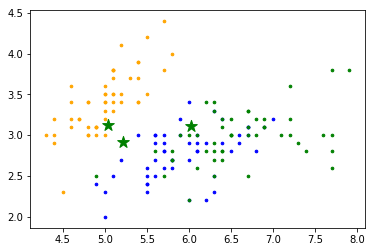

In [6]:
# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

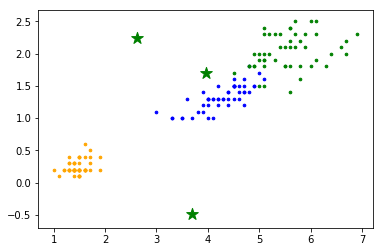

In [7]:
# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 2], data[i,3], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,2], centers[:,3], marker='*', c='g', s=150)

In [8]:
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(data)
# Getting the cluster labels
labels = kmeans.predict(data)
# Centroid values
centroids = kmeans.cluster_centers_

In [9]:
centroids

array([[ 6.85      ,  3.07368421,  5.74210526,  2.07105263],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097]])

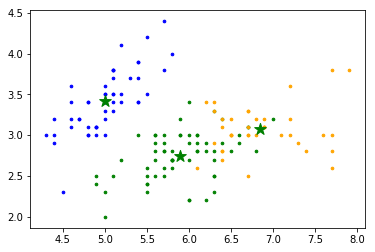

In [10]:
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(labels[i])])
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150)

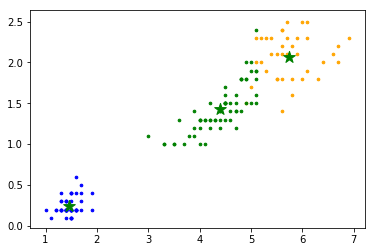

In [11]:
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 2], data[i,3], s=7, color = colors[int(labels[i])])
plt.scatter(centroids[:,2], centroids[:,3], marker='*', c='g', s=150)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
for i in range(0,len(labels)):
    if labels[i] == 1:
        labels[i] = 0
    elif labels[i] == 2:
        labels[i] = 1
    else:
        labels[i] = 2

In [14]:
confusion_matrix(category,labels)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [15]:
X = np.array(list(zip(category,labels)))

In [16]:
X

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,

In [17]:
accuracy_score(category,labels)

0.89333333333333331

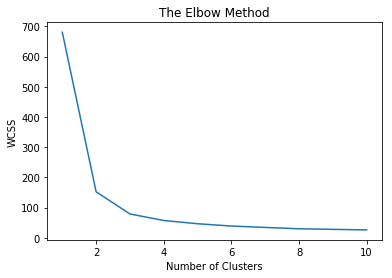

In [36]:
wcss=[]
df = pd.read_csv("Iris.csv") #load the dataset
df.drop('Id',axis=1,inplace=True) 
# Change categorical data to number 0-2
df["Species"] = pd.Categorical(df["Species"])
df["Species"] = df["Species"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 0:4]
category = df.values[:, 4]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()